# Visualisation Dashboard

Analyzing the [Stack Overflow Developer Survey](https://insights.stackoverflow.com/survey) Results 2021 dataset.


**Note**: Not because other genders, asides from women and men, are not important that are neglected. Due to the scope of the analysis, I will extract more insights focus on the topic I am investigating is **Women in Vietnam.**

## 🦄 Hypothesis:
1. Woman in Tech involves more in 2021?
3. The compensation gaps between women and men are huge?
4. Do underrepresented countries in the survey like Vietnam tend to have less gender disparity in the Tech community?
5. Higher education to get a higher commission in women?
6. How does frequency participation in other online platforms affect commission?
7. What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?
8. What are the most common job among respondents?
9. What are the most common languages among respondents who work in fields related to data science?
11. What are the most common languages used by developers in your home country?
12. Most of the respondents are a in other online platforms?
13. Percentages of men higher than women in this survey
14. The country has the highest yearly compesation is the USA?

### Import data frames

In [2]:
import pandas as pd 
import numpy as np

# Modules for data visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
import plotly.express as px 
import cufflinks as cf

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot #iplot() = plots the figure(fig) that is created by data and layout
init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file 
%run assignment1.py

# ignore DeprecationWarning Eror Messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import main dataframe
survey_public = pd.read_csv('Data/survey_data_cleaned.csv', sep=',')

# print out first 3 lines of the dataframe
style(survey_public.head(3))

In [3]:
# Let's look at the dimension of the data
print(f'Dataframe contain {survey_public.shape[0]} records and {survey_public.shape[1]} columns.')

Dataframe contain 83438 records and 42 columns.


In [4]:
# Get respondent data where Gender contains 'Woman'

#separate dataframes for men and women

# get all the rows that have woman as gender, the rest is converted into NAN
women_df = survey_public.where((survey_public.Gender.str.contains('woman',na=False)), np.nan, inplace=False)

# get all the rows that have man as gender, the rest is converted into NAN
men_df = survey_public.where((survey_public.Gender.str.contains('man',na=False)), np.nan, inplace=False)
men_df.where(~(men_df.Gender.str.contains('woman',na=False)), np.nan, inplace=True)

In [5]:
# Loop through columns have option NAN and impute null values 
for col in ['Gender']:
    women_df[col] = women_df[col].fillna("others not include woman")
    
# Loop through columns have option 'prefer not to say' and fill null values with that value
for col in ['Gender']:
    men_df[col] = men_df[col].fillna("others not include man")

In [6]:
women_df.Gender.value_counts()

others not include woman                                                         79066
woman                                                                             4120
woman;non-binary, genderqueer, or gender non-conforming                            147
man;woman                                                                           41
man;woman;non-binary, genderqueer, or gender non-conforming                         21
man;woman;non-binary, genderqueer, or gender non-conforming;in your own words       17
woman;in your own words                                                             16
woman;non-binary, genderqueer, or gender non-conforming;in your own words            9
man;woman;in your own words                                                          1
Name: Gender, dtype: int64

In [7]:
men_df.Gender.value_counts()

man                                                                        75969
others not include man                                                      6938
man;in your own words                                                        268
man;non-binary, genderqueer, or gender non-conforming                        252
man;non-binary, genderqueer, or gender non-conforming;in your own words       11
Name: Gender, dtype: int64

In [8]:
# simplify different types of gender
women_df['Gender'] = women_df.Gender.apply(lambda x: str(x)
                                           .replace('man;woman;non-binary, genderqueer, or gender non-conforming;in your own words','others include woman')
                                           .replace('woman;non-binary, genderqueer, or gender non-conforming;in your own words','others include woman')
                                           .replace('man;woman;non-binary, genderqueer, or gender non-conforming','others include woman')
                                           .replace('woman;non-binary, genderqueer, or gender non-conforming','others include woman')
                                           .replace('man;woman;in your own words','others include woman')
                                           .replace('woman;in your own words','others include woman')
                                           .replace('man;woman','others include woman')
                                          )

In [9]:
# simplify different types of gender
men_df['Gender'] = men_df.Gender.apply(lambda x: str(x)
                                           .replace('man;non-binary, genderqueer, or gender non-conforming;in your own words','others include man')
                                           .replace('man;non-binary, genderqueer, or gender non-conforming','others include man')
                                           .replace('man;in your own words','others include man')
                                          )

In [10]:
# remove all rows not containing women
women_df.drop(women_df[women_df.Gender == 'others not include woman'].index, inplace=True)

# remove all rows not containing women
men_df.drop(men_df[men_df.Gender == 'others not include man'].index, inplace=True)

In [11]:
# print out sample rows of women data frame
style(women_df.sample(3))

In [12]:
# print out sample rows of men data frame
style(men_df.sample(3))

In [36]:
women_ed_pct = women_df.EdLevel.value_counts() * 100 / women_df.EdLevel.count()
men_ed_pct = men_df.EdLevel.value_counts() * 100 / men_df.EdLevel.count()

bachelor’s degree                   45.150961
master’s degree                     22.735590
college/university but no degree    10.338518
secondary school                     9.858188
other doctoral degree                3.156450
associate degree                     2.904849
primary/elementary school            2.424520
something else                       2.287283
professional degree                  1.143641
Name: EdLevel, dtype: float64

In [37]:
women_ed_pct

bachelor’s degree                   45.150961
master’s degree                     22.735590
college/university but no degree    10.338518
secondary school                     9.858188
other doctoral degree                3.156450
associate degree                     2.904849
primary/elementary school            2.424520
something else                       2.287283
professional degree                  1.143641
Name: EdLevel, dtype: float64

In [38]:
men_ed_pct

bachelor’s degree                   42.905882
master’s degree                     21.005229
college/university but no degree    12.762092
secondary school                    11.456209
other doctoral degree                3.045752
primary/elementary school            2.886275
associate degree                     2.654902
something else                       1.751634
professional degree                  1.532026
Name: EdLevel, dtype: float64

# Pie Chart

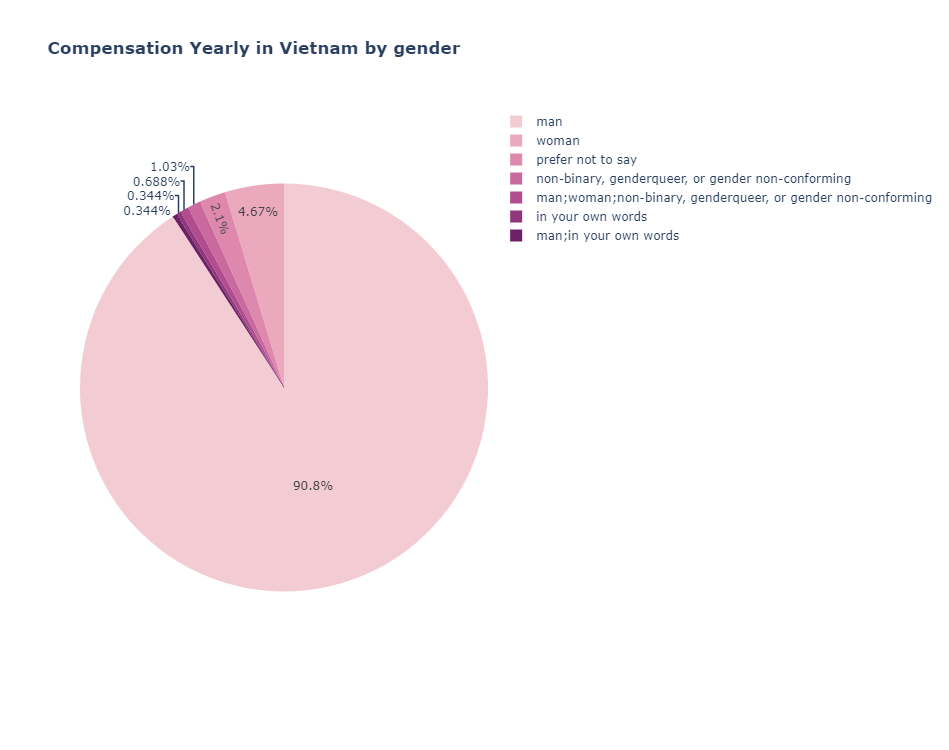

In [70]:
# Create Pie chart of the Compensation Yearly in Vietnam by gender in Viet Nam
df_samer = survey_public.query("Country == 'vietnam'")
fig_Vietnamese = px.pie(df_samer, values='ConvertedCompYearly', names='Gender', 
       title='<b>Compensation Yearly in Vietnam by gender<b>', width=750, height=750, 
       color_discrete_sequence=px.colors.sequential.Magenta)

fig_Vietnamese.show()

**------->**
#### OBSERVATION:

More Vietnamese men than women answered the survey. Surprisingly the yearly compensation gap between men and women is significantly large (14,832,499 USD and 762,831 USD)

# Click on the sunburst graph to see details

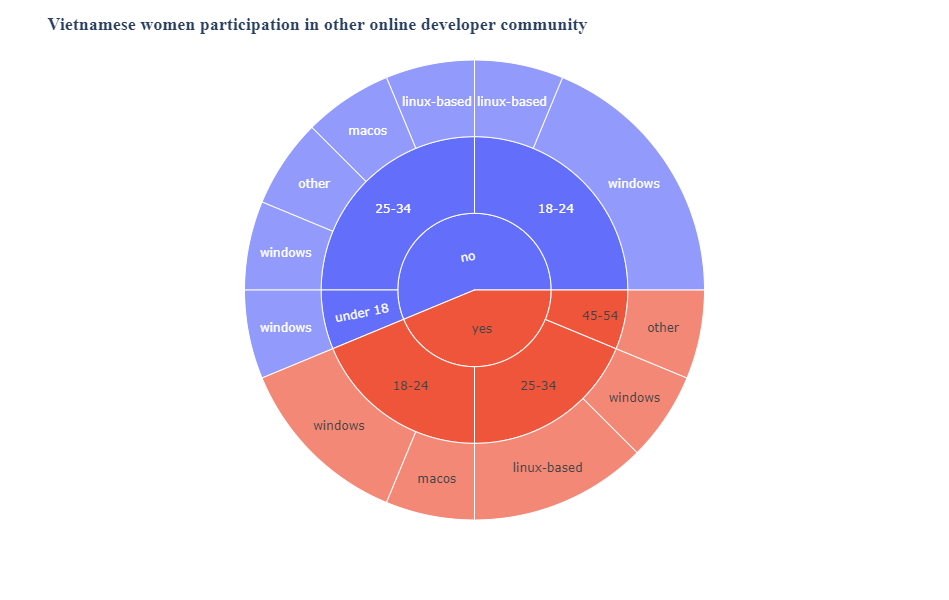

In [67]:
# Sunburst graph on Vietnamese women's participation in other online developer community and their highest education level
df_samer = survey_public.query("Country == 'vietnam'").query("Gender == 'woman'")
fig_woman_participation = px.sunburst(df_samer,
                  path=[df_samer.NEWOtherComms, df_samer.Age, df_samer.OpSys])
fig_woman_participation.update_layout(title_text="<b>Vietnamese women participation in other online developer community<b>", 
                  titlefont={'size': 18, 'family':'Serif'},
                  width=600, 
                  height=600, 
                 )
fig_woman_participation.show()

**------->**
#### OBSERVATION:

+ Most Vietnamese women respondents are not a member of other online developer communities besides Stack Overflow in 2021

+ Older age respondents are more likely to be a member of other online developer communities. This might be because they need more resources to serve their professional work.

+ The most famous operating system in Vietnam for those who responded to the survey is Window. This might be the diversity in the price range of these devices.

# Annotation

With annotation I can draw the attention of your reader to the a specific point(s) on woman and man of all respondents in the dataframe. 

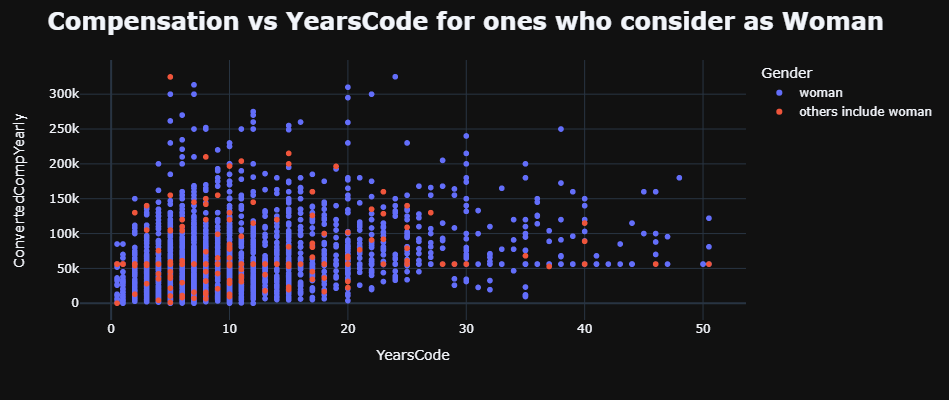

In [18]:
# scatter plot for ones consider themselves woman
fig_woman = px.scatter(women_df,
                 x='YearsCode',
                 y='ConvertedCompYearly',
                 color='Gender',
                 width=900,
                 height=400)

#......update the plot as you wish
fig_woman.update_layout(title='<b>Compensation vs YearsCode for ones who consider as Woman<b>',
                  titlefont={'size': 24},
                  template='plotly_dark'
                  )
fig_woman.show()

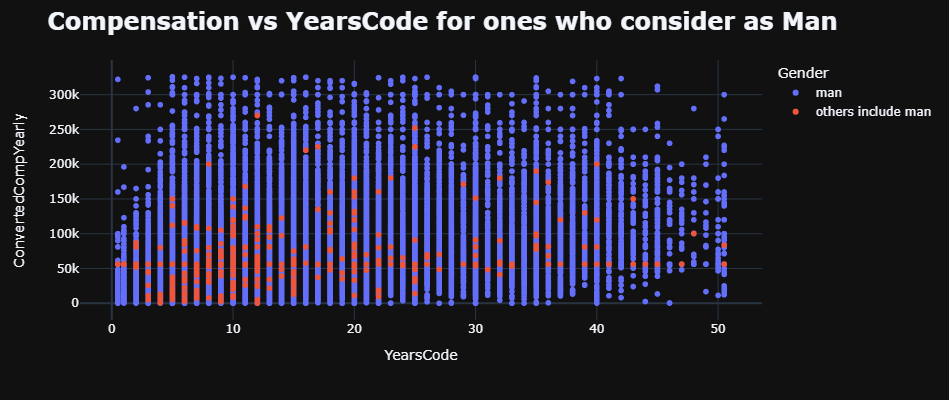

In [20]:
# scatter plot for ones consider themselves man
fig_man = px.scatter(men_df,
                 x='YearsCode',
                 y='ConvertedCompYearly',
                 color='Gender',
                 width=900,
                 height=400)

fig_man.update_layout(title='<b>Compensation vs YearsCode for ones who consider as Man<b>',
                  titlefont={'size': 24},
                  template='plotly_dark'
                  )
fig_man.show()

**-------->**
#### OBSERVATIONS:

+ The vertical axis shows the compensation yearly in USD, while the horizontal axis contains the years of code, including education

+ Based on the constructed correlation matrix and the constructed visualizations, the data for both men and women in the survey are positive correlations between the `YearsCode` and `ConvertedCompYearly.`

+ Men tend to have longer years code and higher compensation at all the stages of coding years

#  Bar Plot (Animation): Slide the bar to see different years coded

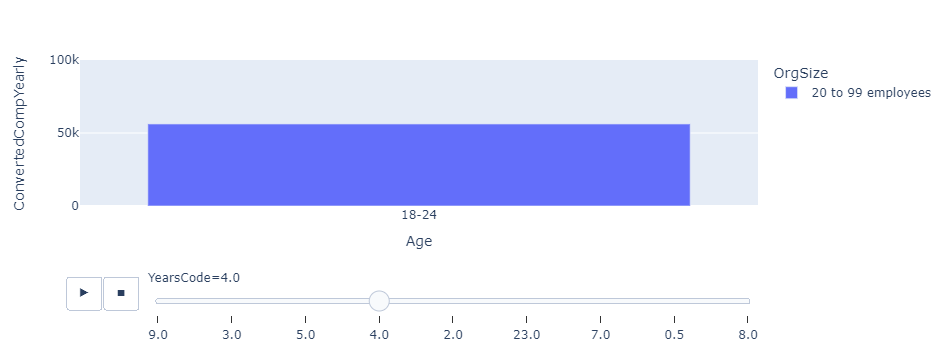

In [60]:
# animated bar plot among age, compensation, organization size of Vietnamese Woman
df_samer = survey_public.query("Country == 'vietnam'").query("Gender == 'woman'")

# Watch as bars chart population changes
fig_animated_bar = px.bar(df_samer, x="Age", y="ConvertedCompYearly", color="OrgSize",
  animation_frame="YearsCode", animation_group="EdLevel", range_y=[0,100000])

fig_animated_bar.show()

**-------->**
#### OBSERVATIONS:

+ Most Vietnamese women responded to the survey work in organization size around 20-99 employees, and their highest average compensation yearly is 56.211k USD

# Exporting as an Interactive HTML

In [68]:
!pip install -U kaleido

fig_man.write_html('scatter-man.html')
fig_woman.write_html('scatter-woman.html')
fig_animated_bar.write_html('fig-animated-bar.html')
fig_woman_participation.write_html('fig-Vietnames-woman-participation.html')
fig_Vietnamese.write_html('fig-Vietnamese-compensation.html')

In [13]:
# To write the data from the data frame into a file, use the to_csv function.
women_df.to_csv('Data/women_df.csv', index=False)

# To write the data from the data frame into a file, use the to_csv function.
men_df.to_csv('Data/men_df.csv', index=False)

# Conclusion

+ More Vietnamese men than women answered the survey. Surprisingly the yearly compensation gap between men and women is significantly large (14,832,499 USD and 762,831 USD)

+ Most Vietnamese women respondents are not a member of other online developer communities besides Stack Overflow in 2021

+ Older age respondents are more likely to be a member of other online developer communities. This might be because they need more resources to serve their professional work.

+ The most famous operating system in Vietnam for those who responded to the survey is Window. This might be the diversity in the price range of these devices.

+ The higher number of years of coding including education ( or years of professional coding not including education), the higher the yearly compensation is. 

+ Most Vietnamese women responded to the survey work in organization size around 20-99 employees, and their highest average compensation yearly is 56.211k USD

+ The most popular language in 2021 is JavaScript

+ The highest median yearly compensation of all the respondents is San Marino, USA only takes second place

+ Most respondents in this survey are not belong to any online developer communities besides Stack Over Flow

+ Over half of the respondents hold a bachelor's, so most programmers seem to have some formal education. However, it's not clear whether they hold a degree in computer science.

+ Web developer seems to get the most popular: first is full stack, then front and back end developer. 

+ Most of the respondents are man (91.78%)

+ Women tend to have a coding career length shorter than men

Finally, these conclusions can not represent the whole Technology and Engineering community when considering the data generation process. There are many confounding factors to consider, such as demographics, accessibility, languages, etc. Since the survey is in English and asking about one's technical background, programmers from non-English-speaking nations, women, and non-binary genders have provided significantly fewer replies and advatanges.

The data comes from this survey sample could not represent the population using StackOverflow or whole the Technical field. Therefore, I could not prove my sample's analysis 100% infers that the diversity gap is severely vast in programming community is true. However, I am confident that the inferences are not false due to how the random and great sample size of the survey was collected. Most importly, people should continue to assist and promote underrepresented populations, regardless of age, nationality, ethnicity, gender, or other factors.

I would recommend Stack Overflow to increase the inclusivity by translating the survey into multiple languages.

# References

+ [Built-in Continuous Color Scales in Python](https://plotly.com/python/builtin-colorscales/#named-builtin-continuous-color-scales)
+ [Plotly Tutorial for Beginners](https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners)
+ [Getting Started with Plotly](https://plotly.com/python/getting-started/)
+ [Deploying Dash Apps](https://dash.plotly.com/deployment)
+ [Girls Who Code](https://girlswhocode.com/)
+ [Girls will Code | Isabel Sieh | TEDxBritishSchoolManila](https://www.youtube.com/watch?v=YQDXpu3t7Og&ab_channel=TEDxTalks)